<a href="https://colab.research.google.com/github/jadams156530/CS4410/blob/main/ExtraCredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

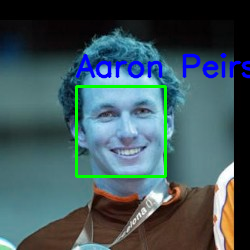

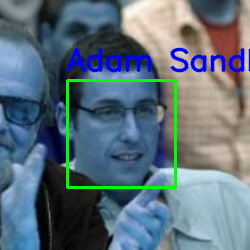

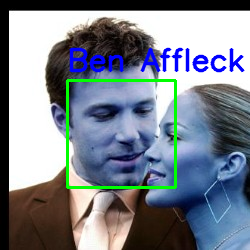


Unidentified images:
Zydrunas_Ilgauskas_0001.jpg
Zydrunas_Ilgauskas_0001.jpg
Adam_Scott_0002.jpg
Adam_Scott_0002.jpg

Missing people:
Mike Pence
Donald Trump
Adam Scott


In [5]:
!pip install face_recognition
import face_recognition
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

# Path to known and unknown faces
KNOWN_DIR = "/content/drive/My Drive/known"
UNKNOWN_DIR = "/content/drive/My Drive/unknown"

# Arrays for known faces and names
face_enc = []
face_n = []

# Loading known faces
for f in os.listdir(KNOWN_DIR):
    path = os.path.join(KNOWN_DIR, f)
    if os.path.isfile(path):
        person_name = os.path.splitext(f)[0]

        img = face_recognition.load_image_file(path)

        face_e = face_recognition.face_encodings(img)

        if len(face_e) > 0:
            face_enc.append(face_e[0])
            face_n.append(person_name)

# Tracking missing and unidentified people
unidentified = []
found = set()
not_found = set(face_n)

# Comparing with unknown faces
for img_file in os.listdir(UNKNOWN_DIR):
    img_path = os.path.join(UNKNOWN_DIR, img_file)

    img = face_recognition.load_image_file(img_path)
    face_locs = face_recognition.face_locations(img)
    face_encs = face_recognition.face_encodings(img, face_locs)

    match = False

    # Looping through faces in image
    for enc in face_encs:
        res = face_recognition.compare_faces(face_enc, enc, tolerance=0.6)

        if True in res:
            match = True
            idx = res.index(True)
            person = face_n[idx]
            found.add(person)
            not_found.discard(person)

            top, right, bottom, left = face_locs[0]
            img = cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)
            img = cv2.putText(img, person, (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
            cv2_imshow(img)
        else:
            unidentified.append(img_file)

    if not match:
        unidentified.append(img_file)

# Showing results
if len(unidentified) > 0:
    print("\nUnidentified images:")
    for img in unidentified:
        print(img)
else:
    print("All faces identified.")

if len(not_found) > 0:
    print("\nMissing people:")
    for person in not_found:
        print(person)
else:
    print("No one is missing.")